# TITLE : MODELS OF SATURATION PRESSURE FROM COMPOSITIONAL DATA MWC7+  TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF SATURATION PRESSURE USING WIDE RANGE OF COMPOSITION DATA AND THIS FILE SHOWS WORK WITH ONE LESS FEATURES (SGC7+) WHICH MULTICOLINEAR WITH MWC7+.


ONCE DATA PRE PROCESS FINAL TRAIN TEST FILE EXPORTED TO DATASOURCE FOR MODEL PREPARATION AND VALIDATION AND ALL OTHER REQUIRED 
DATA EXPORTED TO EXPORT FILE FOR REFERENCING AND ALL.


kINDLY NOTE THAT MAJOR OBJECTIVE OF THIS FILE IS TO NOT EFFECT TRAINING OF MODEL WHICH TAKE TIME FOR HYPERPARAMETER OPTIMIZATION

THIS FILE USED FOR GRAPH PREAPRATION AS WELL AS PREPARATION OF DATA.




In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

## 2. PREPARING DATASET FOR MODELLING

                                  #### Importing data from system to python ####

In [2]:
#IMPORTANT PATH LOCATION FOR OPERATION LISTED HERE 

#ENTER FOLDER PATH INISDE WHICH COLLECTED ALL RAW DATA PRESNETS
path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\DATASOURCE\\"

#ENTER FILE NAME IN WHICH COLLECTED DATA PRESENT
filename = "SATURATION PRESSURE RAWDATA.xlsx"
#ENTER EXCEL SHEET NAME
sheet_name = "DATA"

#ENETER PATH WHERE DATA FORM THIS FILE WANTS TO EXPORTED
export_data_path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\EXPORTED DATA\\"

#ENETER PATH WHERE FIGURES WANTS TO EXPORTED
figure_path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\THESIS FIGURES\\"


In [3]:
## Data stored into data variable
df = pd.read_excel(path+filename,sheet_name = sheet_name,float_format="%.6f")

                                    #### Looking into first five rows ####

In [4]:
df.head()

,Ref.No,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,Psat
0,F1,0.0,0.0020,0.0080,0.2290,0.0720,0.0740,0.0680,0.0590,0.0480,0.4400,257.808550,374.85,96.9
1,F2,0.0,0.0020,0.0130,0.2360,0.0860,0.0670,0.0530,0.0450,0.0400,0.4580,254.072354,372.05,117.7
2,F3,0.0,0.0045,0.0164,0.4585,0.0715,0.0674,0.0395,0.0268,0.0252,0.2902,216.182551,387.35,255.6
3,F4,0.0,0.0040,0.0310,0.5430,0.0860,0.0570,0.0320,0.0200,0.0150,0.2127,205.003611,388.15,320.2
4,F5,0.0,0.0045,0.0207,0.2658,0.0789,0.0673,0.0538,0.0444,0.0335,0.4311,246.367297,394.25,145.8


In [5]:
df.columns

Index(['Ref.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7+',
       'MWC7+', 'Temp', 'Psat'],
      dtype='object')

In [6]:
#REMOVING REF.NO COLUMNS FROM DATA 
data = df[['H2S','N2', 'CO2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7+', 'MWC7+','Temp', 'Psat']]

In [7]:
data.shape

(414, 13)

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,414.0,0.000770,0.003799,0.000000,0.000000,0.000000,0.000000,0.036800
N2,414.0,0.003827,0.005039,0.000000,0.000900,0.002500,0.004725,0.056000
CO2,414.0,0.010917,0.014355,0.000000,0.001925,0.006500,0.013150,0.091100
C1,414.0,0.325818,0.127562,0.029000,0.255075,0.308900,0.409100,0.741800
C2,414.0,0.067688,0.028364,0.000200,0.058000,0.072000,0.082800,0.212921
C3,414.0,0.058578,0.028755,0.000040,0.047500,0.062605,0.072800,0.354379
C4,414.0,0.042710,0.019810,0.000040,0.032050,0.044100,0.054999,0.158306
C5,414.0,0.031086,0.015401,0.000000,0.020000,0.030347,0.040875,0.078500
C6,414.0,0.030691,0.014523,0.000000,0.021725,0.031000,0.040500,0.083000
C7+,414.0,0.431960,0.151675,0.003500,0.334825,0.430050,0.489000,0.902000


In [9]:
#COPYING DATASET INTO NEW VARIABLE TO PERFORM OPERATION IN PRIVIOUS DATA IN FUTURE
new_data = data.copy()

                       #### Removing missing values and Duplicates records present ####

In [10]:
#LOOKING FOR MISSING VALUES
new_data.isnull().sum()

H2S      0
N2       0
CO2      0
C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7+      0
MWC7+    0
Temp     0
Psat     0
dtype: int64

<AxesSubplot:>

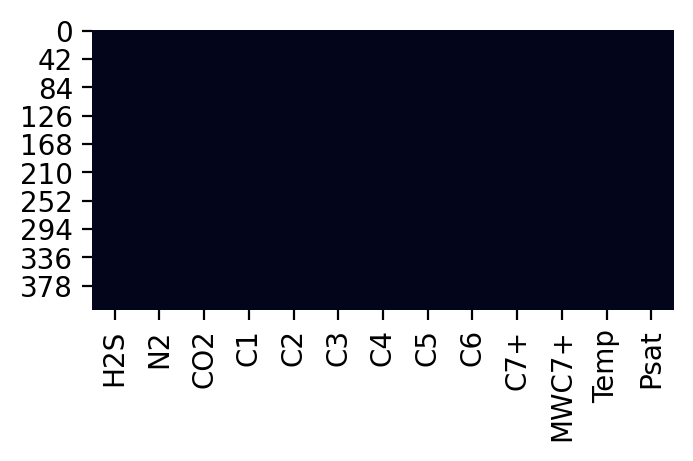

In [11]:
#Heatmap to vizualize null values

fig1 = plt.figure(figsize = (3.75,1.85),dpi=200)
sns.heatmap(new_data.isnull() , cbar = False)

In [12]:
##Removing missing values present however no missing values were present.
data_dropna = new_data.dropna()

<AxesSubplot:>

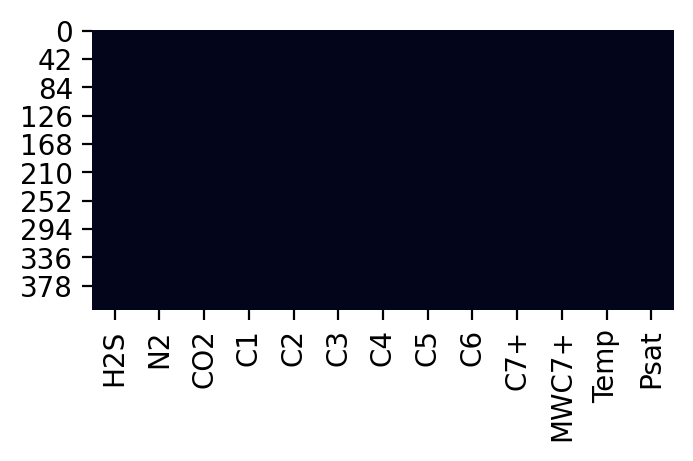

In [13]:
plt.figure(figsize = (3.75,1.85),dpi=200)
sns.heatmap(data_dropna.isnull() , cbar = False)

In [14]:
#Prepare Subplot If required


In [15]:
#cheking for duplicate values because data taken from litureature hence possibility to duplicate values
data_dropna.duplicated().sum()

113

In [16]:
#droping duplicate values 
data_dropna_duplicate = data_dropna.drop_duplicates()

In [17]:
#df.iloc[data_dropna_duplicate.index].to_excel("FINAL_PSAT_DATA_REF.xlsx")

In [18]:
##Storing data into raw_data for further calculation 
raw_data = data_dropna_duplicate.copy()

In [19]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,301.0,0.001059,0.004423,0.000000,0.000000,0.000000,0.000000,0.036800
N2,301.0,0.003831,0.005362,0.000000,0.000900,0.002490,0.004500,0.056000
CO2,301.0,0.011282,0.013556,0.000000,0.002500,0.007800,0.013800,0.091100
C1,301.0,0.319104,0.125885,0.029000,0.247900,0.304800,0.404800,0.741800
C2,301.0,0.065529,0.029596,0.000200,0.054800,0.071500,0.081700,0.212921
C3,301.0,0.056895,0.030617,0.000040,0.046300,0.062100,0.072300,0.354379
C4,301.0,0.041939,0.020419,0.000040,0.030700,0.043000,0.054995,0.158306
C5,301.0,0.031206,0.016073,0.000000,0.019700,0.031000,0.043500,0.078500
C6,301.0,0.030680,0.015030,0.000000,0.021900,0.030700,0.040500,0.083000
C7+,301.0,0.443927,0.155535,0.003500,0.343999,0.434100,0.496100,0.902000


In [20]:
#Share To excel If required



In [21]:
new_raw_data_old = raw_data.copy()

In [22]:
new_raw_data_old.columns

Index(['H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7+', 'MWC7+',
       'Temp', 'Psat'],
      dtype='object')

In [23]:
new_raw_data = new_raw_data_old.copy()

In [24]:
new_raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,301.0,0.001059,0.004423,0.000000,0.000000,0.000000,0.000000,0.036800
N2,301.0,0.003831,0.005362,0.000000,0.000900,0.002490,0.004500,0.056000
CO2,301.0,0.011282,0.013556,0.000000,0.002500,0.007800,0.013800,0.091100
C1,301.0,0.319104,0.125885,0.029000,0.247900,0.304800,0.404800,0.741800
C2,301.0,0.065529,0.029596,0.000200,0.054800,0.071500,0.081700,0.212921
C3,301.0,0.056895,0.030617,0.000040,0.046300,0.062100,0.072300,0.354379
C4,301.0,0.041939,0.020419,0.000040,0.030700,0.043000,0.054995,0.158306
C5,301.0,0.031206,0.016073,0.000000,0.019700,0.031000,0.043500,0.078500
C6,301.0,0.030680,0.015030,0.000000,0.021900,0.030700,0.040500,0.083000
C7+,301.0,0.443927,0.155535,0.003500,0.343999,0.434100,0.496100,0.902000


## 3. Exploratery Data Analysis

                                    #### Computing Corelationship matrix ####

In [25]:
#paerson Corelation matrix
new_raw_data.corr()

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,Psat
H2S,1.000000,-0.033484,0.239276,-0.173487,0.041980,0.061004,0.065534,0.145936,0.017432,0.038525,-0.009439,0.172890,-0.094250
N2,-0.033484,1.000000,0.004197,-0.023624,-0.061797,0.095574,0.178370,0.182393,0.103705,-0.081142,-0.078995,0.024519,0.015529
CO2,0.239276,0.004197,1.000000,0.113492,0.106556,0.028081,0.049349,0.114970,-0.043566,-0.219998,-0.060859,0.454418,0.234009
C1,-0.173487,-0.023624,0.113492,1.000000,0.330203,-0.049318,-0.249101,-0.368877,-0.390342,-0.727087,-0.288901,0.407292,0.951645
C2,0.041980,-0.061797,0.106556,0.330203,1.000000,0.799744,0.568579,0.321336,0.177536,-0.743285,-0.579732,0.312093,0.347566
C3,0.061004,0.095574,0.028081,-0.049318,0.799744,1.000000,0.836781,0.531964,0.303072,-0.514338,-0.494155,0.133750,-0.017976
C4,0.065534,0.178370,0.049349,-0.249101,0.568579,0.836781,1.000000,0.814116,0.563140,-0.356166,-0.505303,0.175090,-0.163563
C5,0.145936,0.182393,0.114970,-0.368877,0.321336,0.531964,0.814116,1.000000,0.696241,-0.169899,-0.427474,0.219929,-0.251623
C6,0.017432,0.103705,-0.043566,-0.390342,0.177536,0.303072,0.563140,0.696241,1.000000,-0.014463,-0.364288,-0.003546,-0.340364
C7+,0.038525,-0.081142,-0.219998,-0.727087,-0.743285,-0.514338,-0.356166,-0.169899,-0.014463,1.000000,0.589496,-0.477734,-0.731159


In [26]:
#sparerman Corelation matrix
new_raw_data.corr("spearman")

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,Psat
H2S,1.000000,-0.031547,0.282985,-0.222266,0.038900,0.111410,0.141821,0.212175,0.094916,0.073698,0.094024,0.162535,-0.130503
N2,-0.031547,1.000000,-0.049621,-0.137457,-0.140595,0.196373,0.334208,0.294494,0.097233,0.012066,0.021843,-0.027294,-0.091751
CO2,0.282985,-0.049621,1.000000,0.103634,0.086832,-0.049562,0.018543,0.095673,-0.026237,-0.214228,-0.051784,0.390618,0.200153
C1,-0.222266,-0.137457,0.103634,1.000000,0.323213,-0.126139,-0.310306,-0.397758,-0.415683,-0.760836,-0.345847,0.413763,0.957212
C2,0.038900,-0.140595,0.086832,0.323213,1.000000,0.671948,0.347446,0.195281,0.102503,-0.625959,-0.387308,0.223482,0.348301
C3,0.111410,0.196373,-0.049562,-0.126139,0.671948,1.000000,0.786780,0.589631,0.378749,-0.351323,-0.305142,0.136221,-0.032445
C4,0.141821,0.334208,0.018543,-0.310306,0.347446,0.786780,1.000000,0.845232,0.572057,-0.191286,-0.320546,0.171550,-0.182249
C5,0.212175,0.294494,0.095673,-0.397758,0.195281,0.589631,0.845232,1.000000,0.677668,-0.087162,-0.266611,0.206661,-0.265977
C6,0.094916,0.097233,-0.026237,-0.415683,0.102503,0.378749,0.572057,0.677668,1.000000,0.135335,-0.106134,-0.032082,-0.364377
C7+,0.073698,0.012066,-0.214228,-0.760836,-0.625959,-0.351323,-0.191286,-0.087162,0.135335,1.000000,0.537246,-0.514996,-0.802053


In [27]:
#Share TO excel If neccesory

<ipython-input-28-3eb315b4fbae>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig3.savefig(figure_path + "Psat corelation matrix.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-28-3eb315b4fbae>:11: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig3.savefig(figure_path + "Psat corelation matrix.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


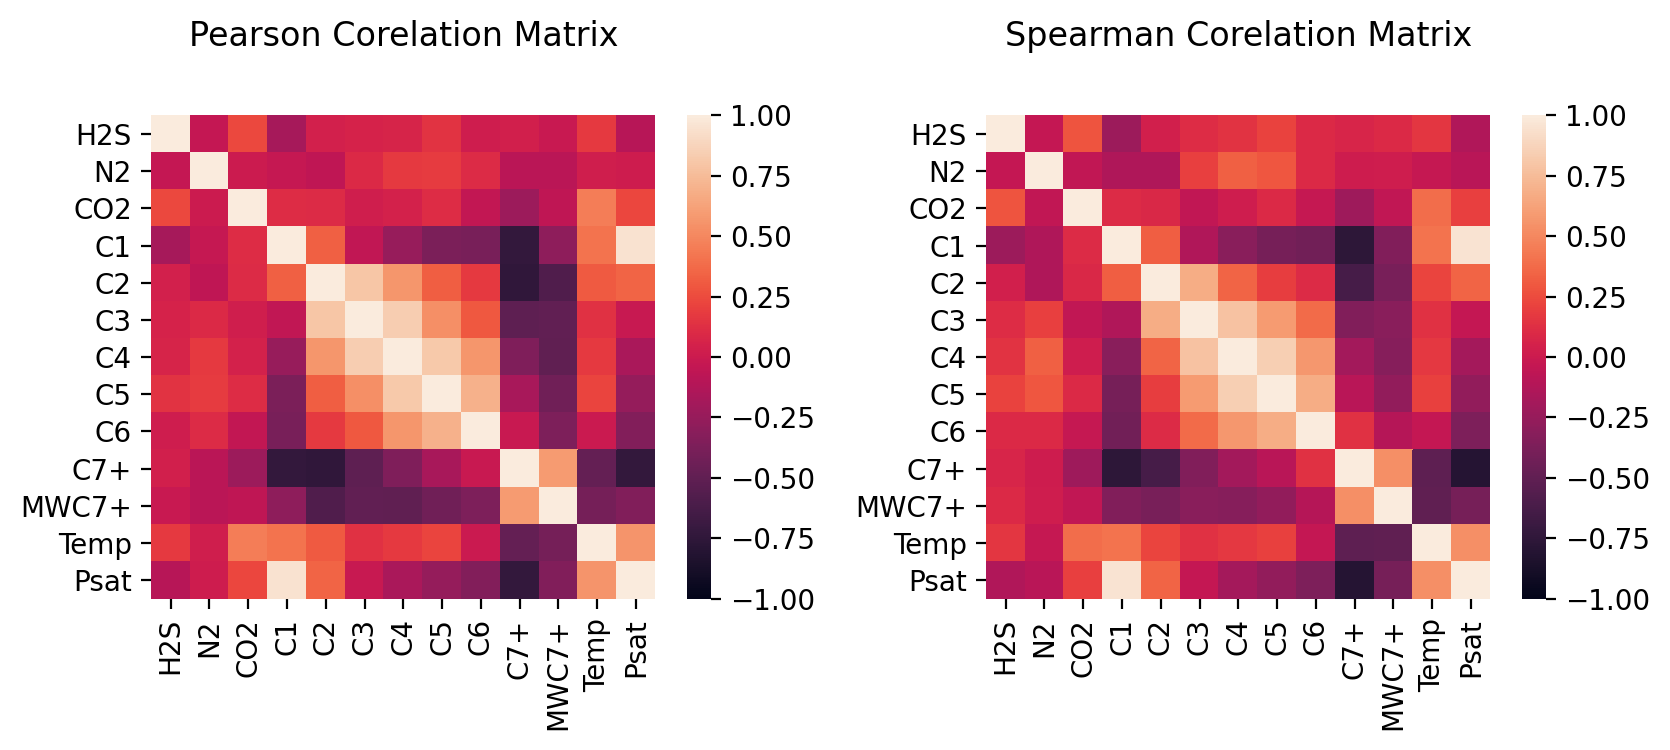

In [28]:
## heat map of corelationship matrix
fig3 = plt.figure(figsize = (8.5,3.85),dpi = 200)
plt.subplot(1,2,1)
sns.heatmap(new_raw_data.corr(),vmax=1,vmin = -1)
plt.title("Pearson Corelation Matrix" , fontsize =12, pad = 25)
plt.subplot(1,2,2)
sns.heatmap(new_raw_data.corr("spearman"),vmax=1,vmin = -1)
plt.tight_layout()
plt.title("Spearman Corelation Matrix" , fontsize =12, pad = 25)

#fig3.savefig(figure_path + "Psat corelation matrix.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

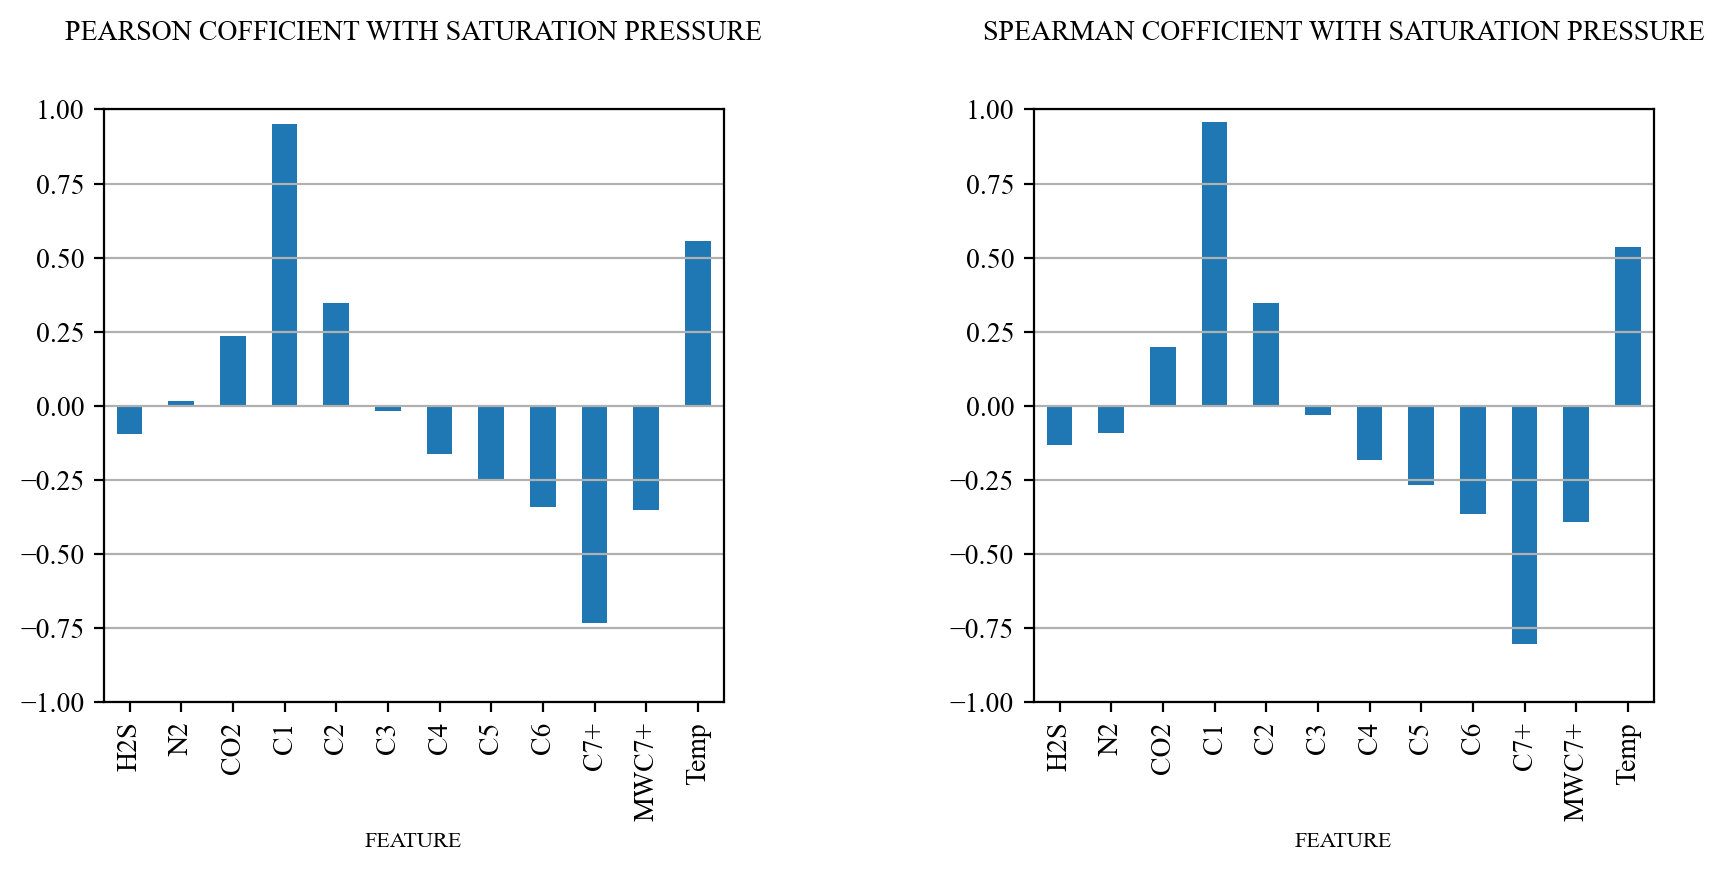

In [29]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig4 = plt.figure(figsize = (10,3.85),dpi = 200)
plt.subplot(1,2,1)
new_raw_data.corr()["Psat"].drop("Psat").plot(kind = "bar")
plt.title("PEARSON COFFICIENT WITH SATURATION PRESSURE" , fontsize =10, pad = 25)
plt.xlabel("FEATURE" , fontsize = 8)
plt.ylim((-1,1))
plt.grid(axis = "y")
plt.subplot(1,2,2)
new_raw_data.corr("spearman")["Psat"].drop("Psat").plot(kind = "bar")
plt.title("SPEARMAN COFFICIENT WITH SATURATION PRESSURE" , fontsize =10, pad = 25)
plt.xlabel("FEATURE" , fontsize = 8)
plt.ylim((-1,1))
plt.grid(axis = "y")
plt.subplots_adjust(wspace=0.5)  

#fig4.savefig(figure_path + "Psat corelation value.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-30-44ce04af9e5e>:61: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig5.savefig(figure_path + "Pearson PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-30-44ce04af9e5e>:61: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig5.savefig(figure_path + "Pearson PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


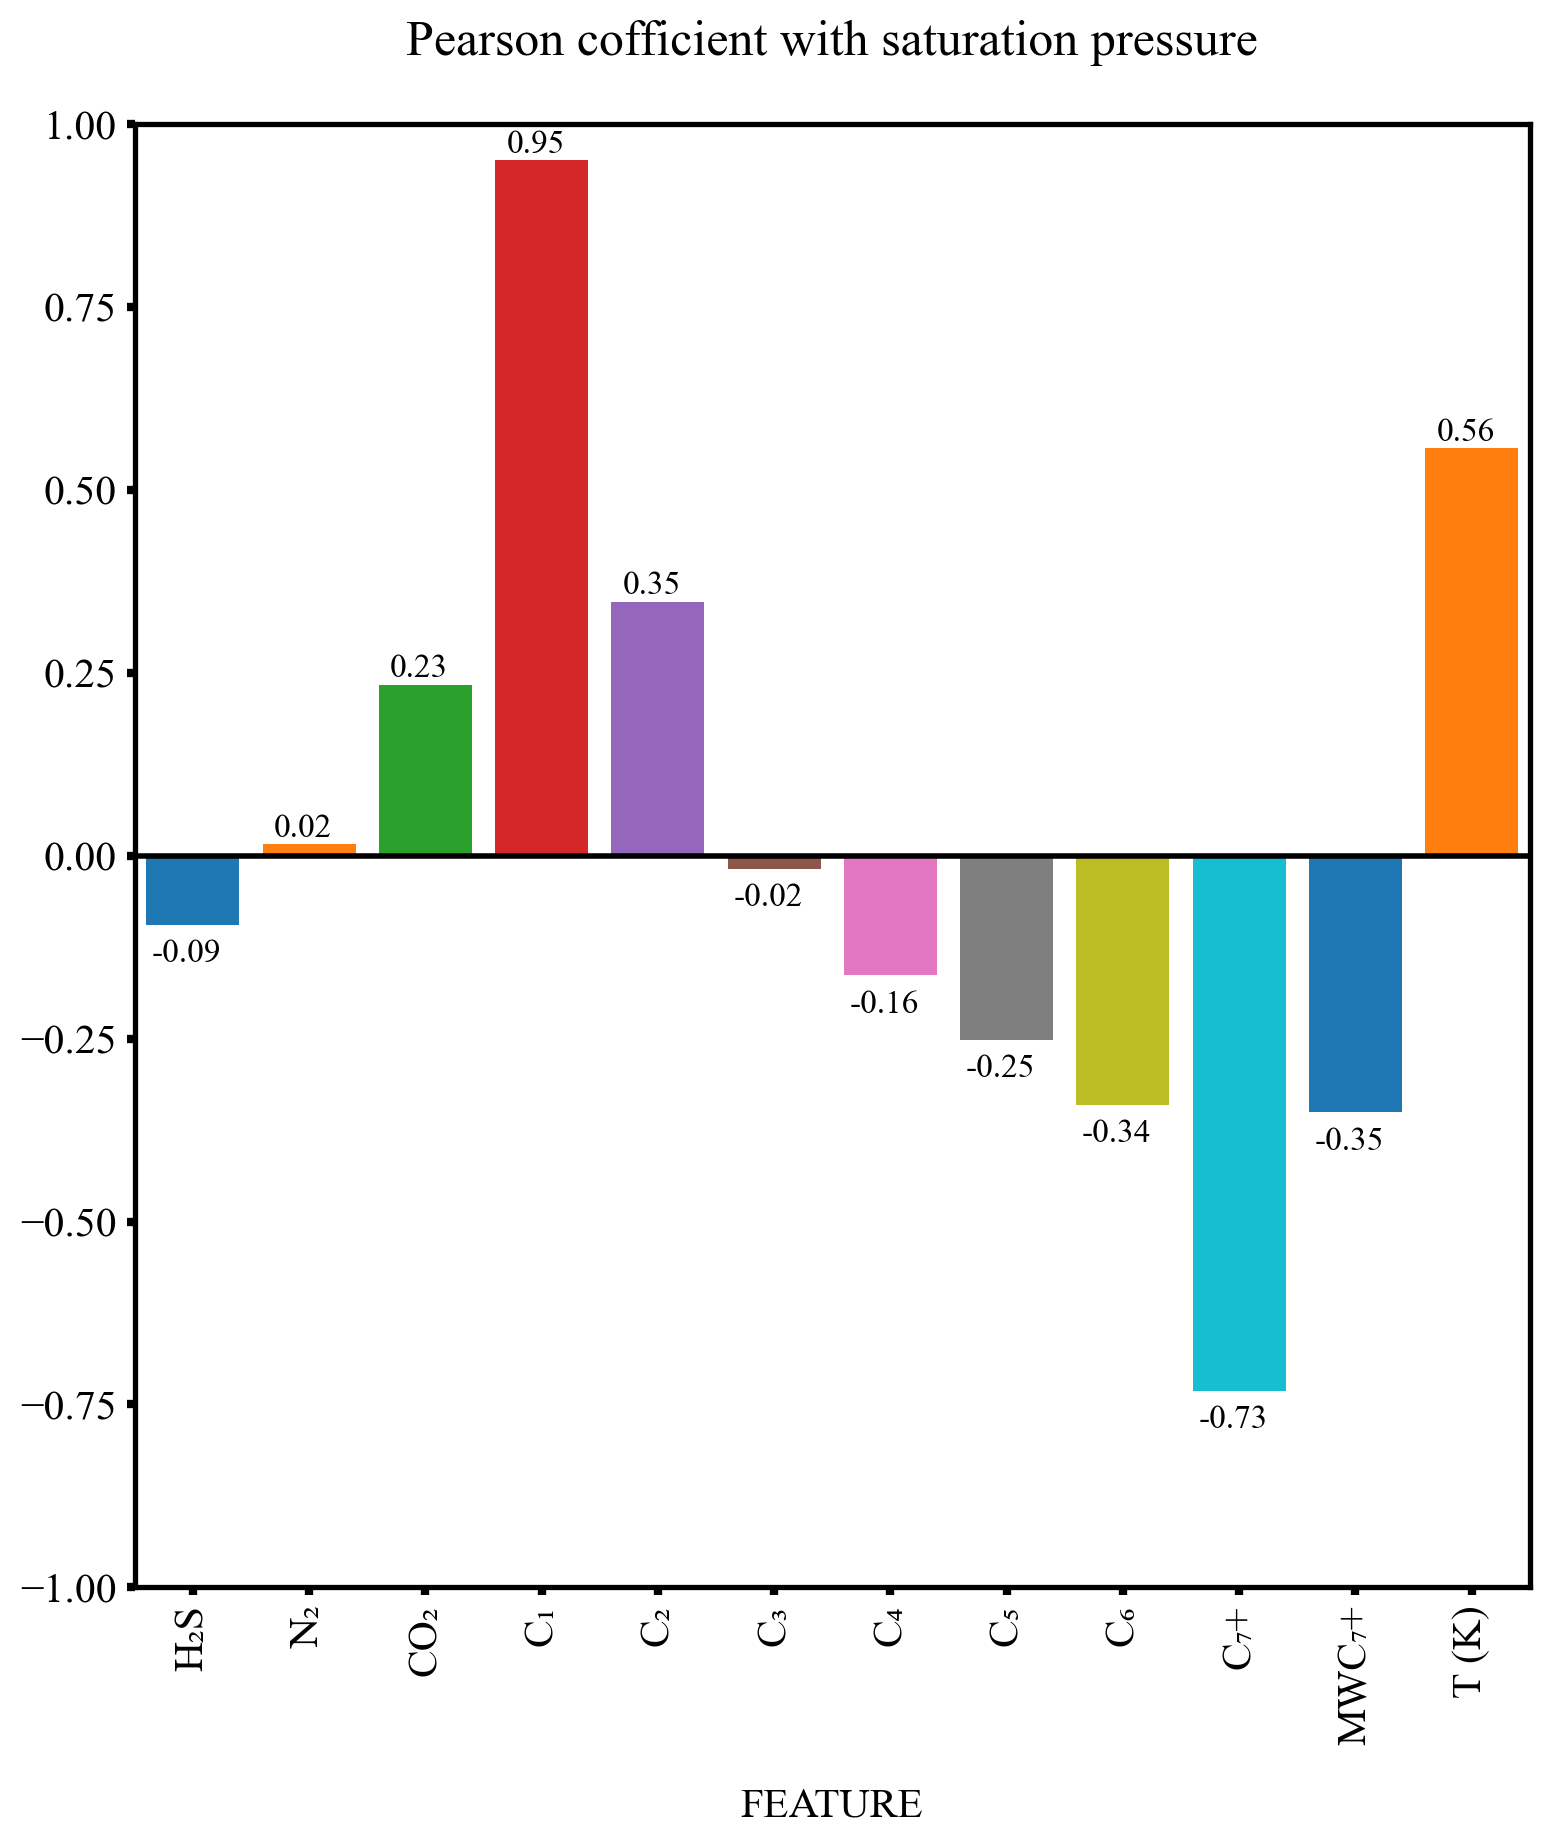

In [30]:
pearson_data = new_raw_data.corr()[["Psat"]].drop("Psat")

pearson_data.index = ["H\u2082S", "N\u2082","CO\u2082","C\u2081","C\u2082","C\u2083","C\u2084","C\u2085","C\u2086","C\u2087+","MWC\u2087+"]  + ["T (K)"]
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 3
fig5 = plt.figure(figsize = (9,9.5) , dpi = 200)
plot_p = sns.barplot(x = pearson_data.index ,y = pearson_data["Psat"],palette="tab10",saturation = 10)
#plt.grid(axis = "y", color = "black")
plt.axhline(y = 0, color = 'black',ls = "-" ,lw = 2)

plt.ylim((-1,1))
plt.title("Pearson cofficient with saturation pressure" , fontsize =18, pad = 25)
plt.xlabel("FEATURE" , fontsize = 15, labelpad = 15)
plt.xticks(rotation = 90)


#Adding Annotation to each bar
for bar in [plot_p.patches[i] for i in [0,5,6,7,8,9,10]]:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plot_p.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2.3,
                    bar.get_height()), ha='center', va='center',
                   size=12,xytext=(0, -10.5),
                   textcoords='offset points')

for bar in [plot_p.patches[i] for i in [1,2,3,4,-1]]:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plot_p.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2.3,
                    bar.get_height()), ha='center', va='center',
                   size=12,xytext=(0, 5.5),
                   textcoords='offset points')
    
ax = fig5.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.9)
    

    
plot_p.set(ylabel = None)
fig5.savefig(figure_path + "Pearson PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


In [31]:
list(pearson_data.index)[3:]

['C₁', 'C₂', 'C₃', 'C₄', 'C₅', 'C₆', 'C₇+', 'MWC₇+', 'T (K)']

                          #### HISTOGRAM OF DATA ####

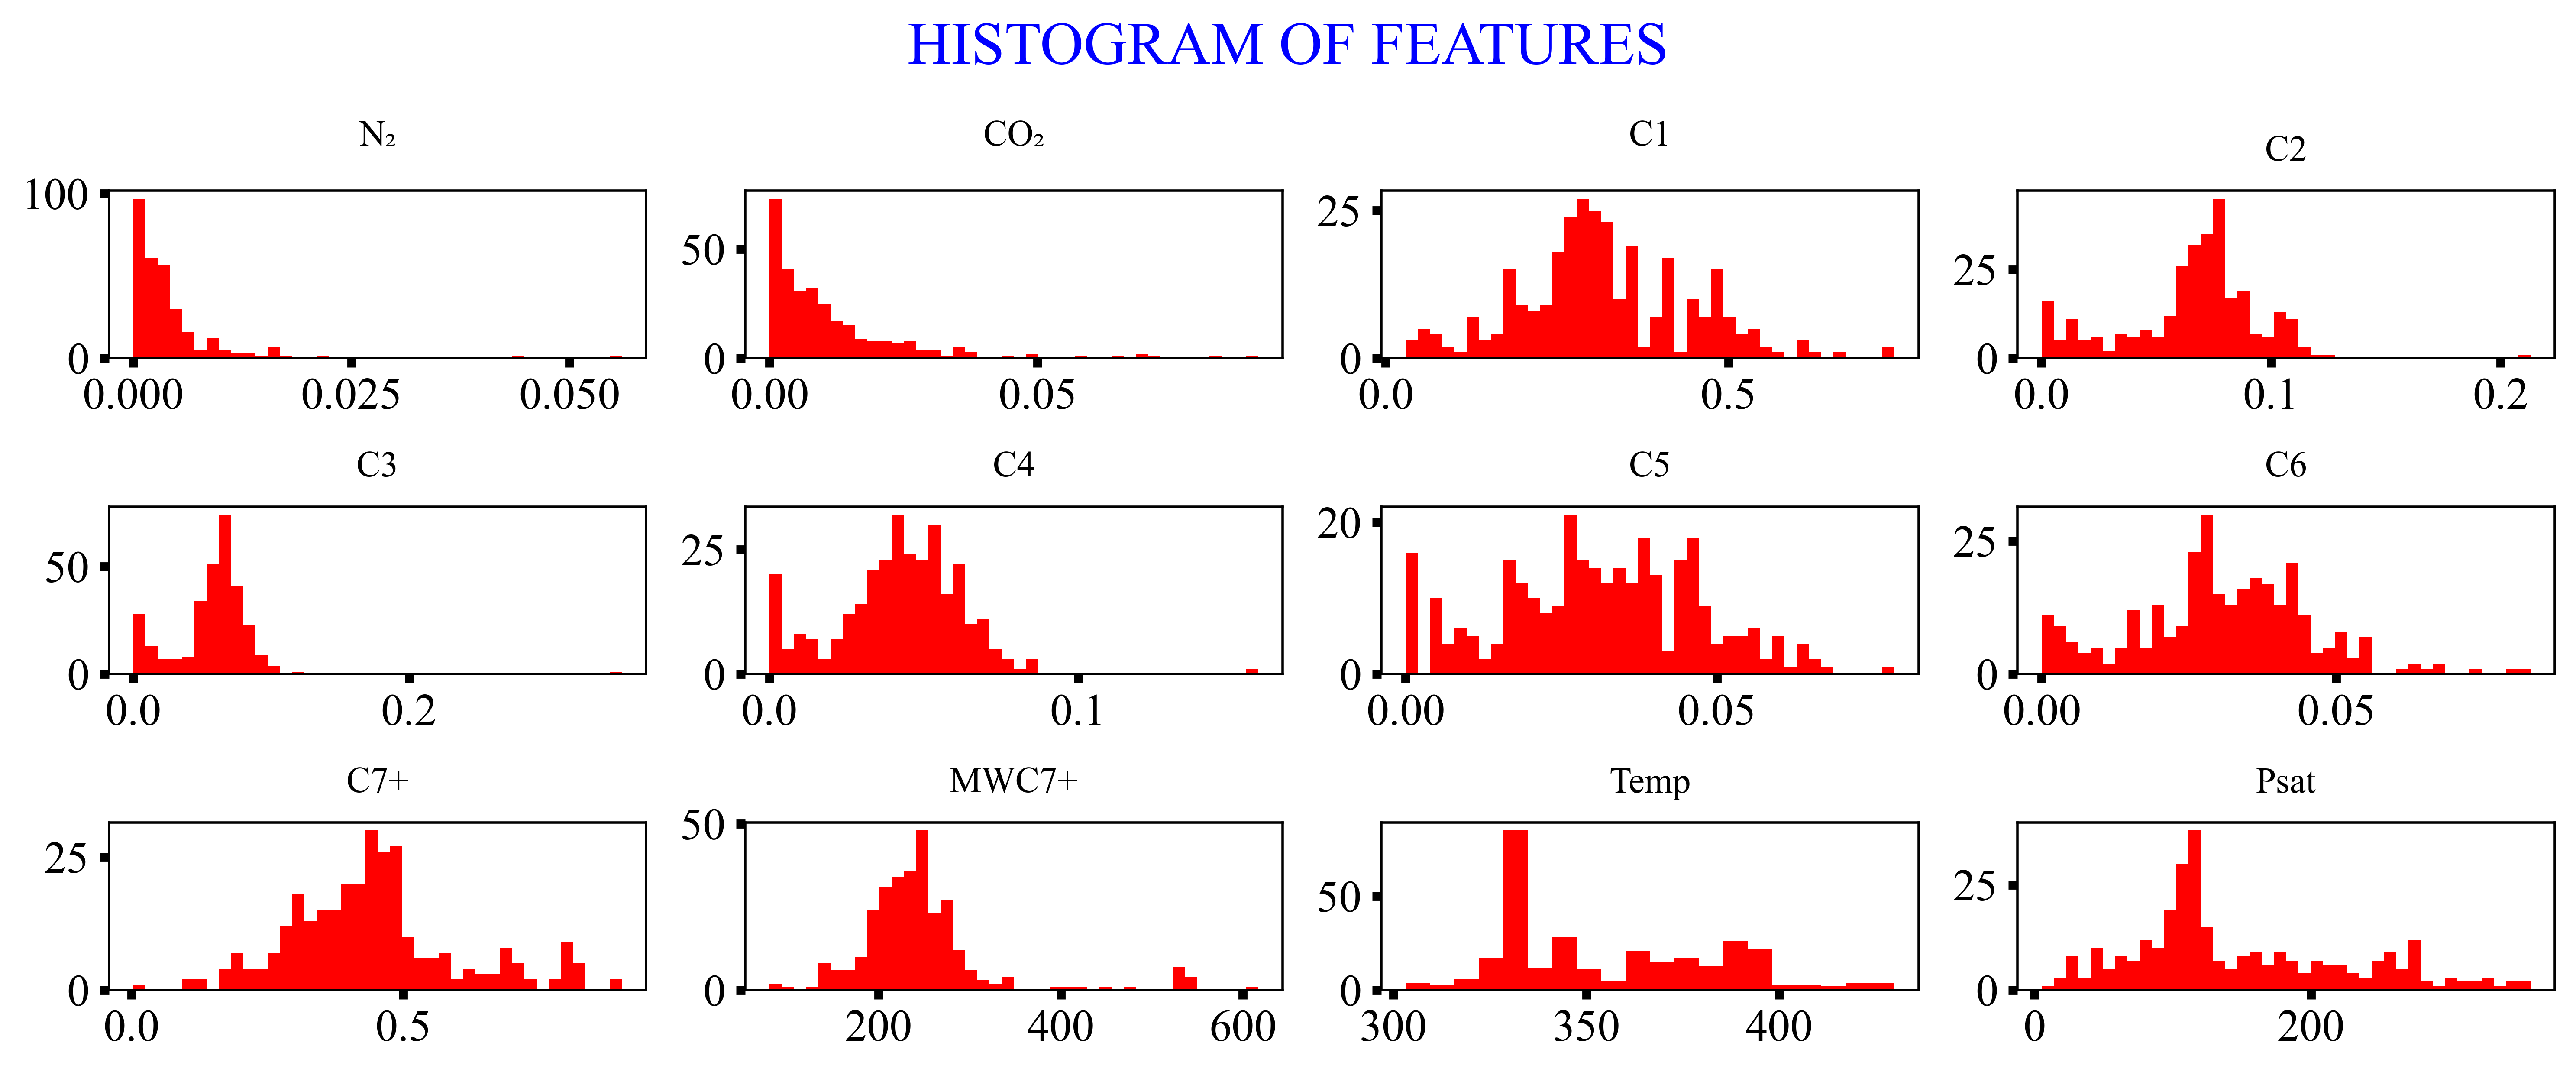

In [32]:
plt.figure(figsize=(12,5) , dpi =500)
plt.suptitle("HISTOGRAM OF FEATURES" , fontsize = 20 , c = "blue")

plt.subplot(3,4,1)
plt.hist(new_raw_data["N2"], color ="red", bins = 40)
plt.title("N\u2082" , pad = 15)

plt.subplot(3,4,2)
plt.hist(new_raw_data["CO2"], color ="red", bins = 40)
plt.title("CO\u2082" , pad = 15)


plt.subplot(3,4,3)
plt.hist(new_raw_data["C1"], color ="red", bins = 40)
plt.title("C1" , pad = 15)


plt.subplot(3,4,4)
plt.hist(new_raw_data["C2"], color ="red", bins = 40)
plt.title("C2" , pad = 10)



plt.subplot(3,4,5)
plt.hist(new_raw_data["C3"], color ="red", bins = 40)
plt.title("C3" , pad = 10)



plt.subplot(3,4,6)
plt.hist(new_raw_data["C4"], color ="red", bins = 40)
plt.title("C4" , pad = 10)



plt.subplot(3,4,7)
plt.hist(new_raw_data["C5"], color ="red", bins = 40)
plt.title("C5" , pad = 10)



plt.subplot(3,4,8)
plt.hist(new_raw_data["C6"], color ="red", bins = 40)
plt.title("C6" , pad = 10)


plt.subplot(3,4,9)
plt.hist(new_raw_data["C7+"], color ="red", bins = 40)
plt.title("C7+" , pad = 10)



plt.subplot(3,4,10)
plt.hist(new_raw_data["MWC7+"], color ="red", bins = 40)
plt.title("MWC7+" , pad = 10)


plt.subplot(3,4,11)
plt.hist(new_raw_data["Temp"], color ="red", bins = 20)
plt.title("Temp" , pad = 10)

plt.subplot(3,4,12)
plt.hist(new_raw_data["Psat"], color ="red", bins = 40)
plt.title("Psat" , pad = 10)

plt.tight_layout()


In [33]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 3

mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.major.width'] = 4

fig5 = plt.figure(figsize=(25,15) , dpi =500)
plt.suptitle("HISTOGRAM OF FEATURES" , fontsize = 30 , c = "black")

ax1 = plt.subplot(3,4,1)
sns.kdeplot(new_raw_data["N2"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("N\u2082" , fontsize = 20, labelpad = 15)


ax2 = plt.subplot(3,4,2)
sns.kdeplot(new_raw_data["CO2"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("CO\u2082" , fontsize = 20, labelpad = 15)


ax3 = plt.subplot(3,4,3)
sns.kdeplot(new_raw_data["C1"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("C\u2081" , fontsize = 20, labelpad = 15)


ax4 = plt.subplot(3,4,4)
sns.kdeplot(new_raw_data["C2"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("C\u2082" , fontsize = 20, labelpad = 15)



ax5 = plt.subplot(3,4,5)
sns.kdeplot(new_raw_data["C3"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("C\u2083" , fontsize = 20, labelpad = 15)



ax6 = plt.subplot(3,4,6)
sns.kdeplot(new_raw_data["C4"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("C\u2084" , fontsize = 20, labelpad = 15)


ax7 = plt.subplot(3,4,7)
sns.kdeplot(new_raw_data["C5"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("C\u2085" , fontsize = 20, labelpad = 15)



ax8 = plt.subplot(3,4,8)
sns.kdeplot(new_raw_data["C6"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("C\u2086" , fontsize = 20, labelpad = 15)


ax9 = plt.subplot(3,4,9)
sns.kdeplot(new_raw_data["C7+"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("C\u2087+" , fontsize = 20, labelpad = 15)



ax10 = plt.subplot(3,4,10)
sns.kdeplot(new_raw_data["MWC7+"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("MWC\u2087+" , fontsize = 20, labelpad = 15)


ax11 = plt.subplot(3,4,11)
sns.kdeplot(new_raw_data["Temp"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("T (K)" , fontsize = 20, labelpad = 15)

ax12 = plt.subplot(3,4,12)
sns.kdeplot(new_raw_data["Psat"], color ="black")
plt.ylabel("Density" , fontsize = 20, labelpad = 15)
plt.xlabel("Psat (bar)" , fontsize = 20, labelpad = 15)

plt.subplots_adjust(wspace=0.5,hspace=0.4)  

ax1.set_xlim(None,0.06)
ax1.set_ylim(0,125)

ax2.set_xlim(None,None)
ax2.set_ylim(0,60)

ax3.set_xlim(None,1)
ax3.set_ylim(0,4)

ax4.set_xlim(None,0.6)
ax4.set_ylim(0,20)

ax5.set_xlim(None,0.4)
ax5.set_ylim(0,25)

ax6.set_xlim(None,0.2)
ax6.set_ylim(0,25)

ax7.set_xlim(None,0.1)
ax7.set_ylim(0,30)

ax8.set_xlim(None,0.1)
ax8.set_ylim(0,30)

ax9.set_xlim(None,1.5)
ax9.set_ylim(0,4)

ax10.set_xlim(None,800)
ax10.set_ylim(0,0.01)

ax11.set_xlim(250,500)
ax11.set_ylim(0,0.02)

ax12.set_xlim(None,500)
ax12.set_ylim(0,0.008)

#Changing Border thickness of all subplots
for i in range(1,13,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(3)
        
fig5.savefig(figure_path + "KDE PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-33-7a83905ea30a>:131: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig5.savefig(figure_path + "KDE PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-33-7a83905ea30a>:131: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig5.savefig(figure_path + "KDE PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


In [34]:
##Not Removing Outliers Present inside Dataset to check effect
#Use if it required
def outlier_removal(data):
        def outlier_limits(col):
            Q3, Q1 = col.quantile([0.75,0.25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype == 'float64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL),np.nan, data[column])

        return data

In [35]:
final_dataset = new_raw_data.copy()

In [36]:
final_dataset.shape

(301, 13)

In [37]:
state_description = final_dataset.describe().transpose()
state_description.to_excel(export_data_path+"STATISTIC DESCRIPTION.xlsx")

                             #### Scatter Plot of Features vs label ####

<ipython-input-38-3cdfab84330c>:145: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig6.savefig(figure_path + "SCATTER PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-38-3cdfab84330c>:145: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig6.savefig(figure_path + "SCATTER PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


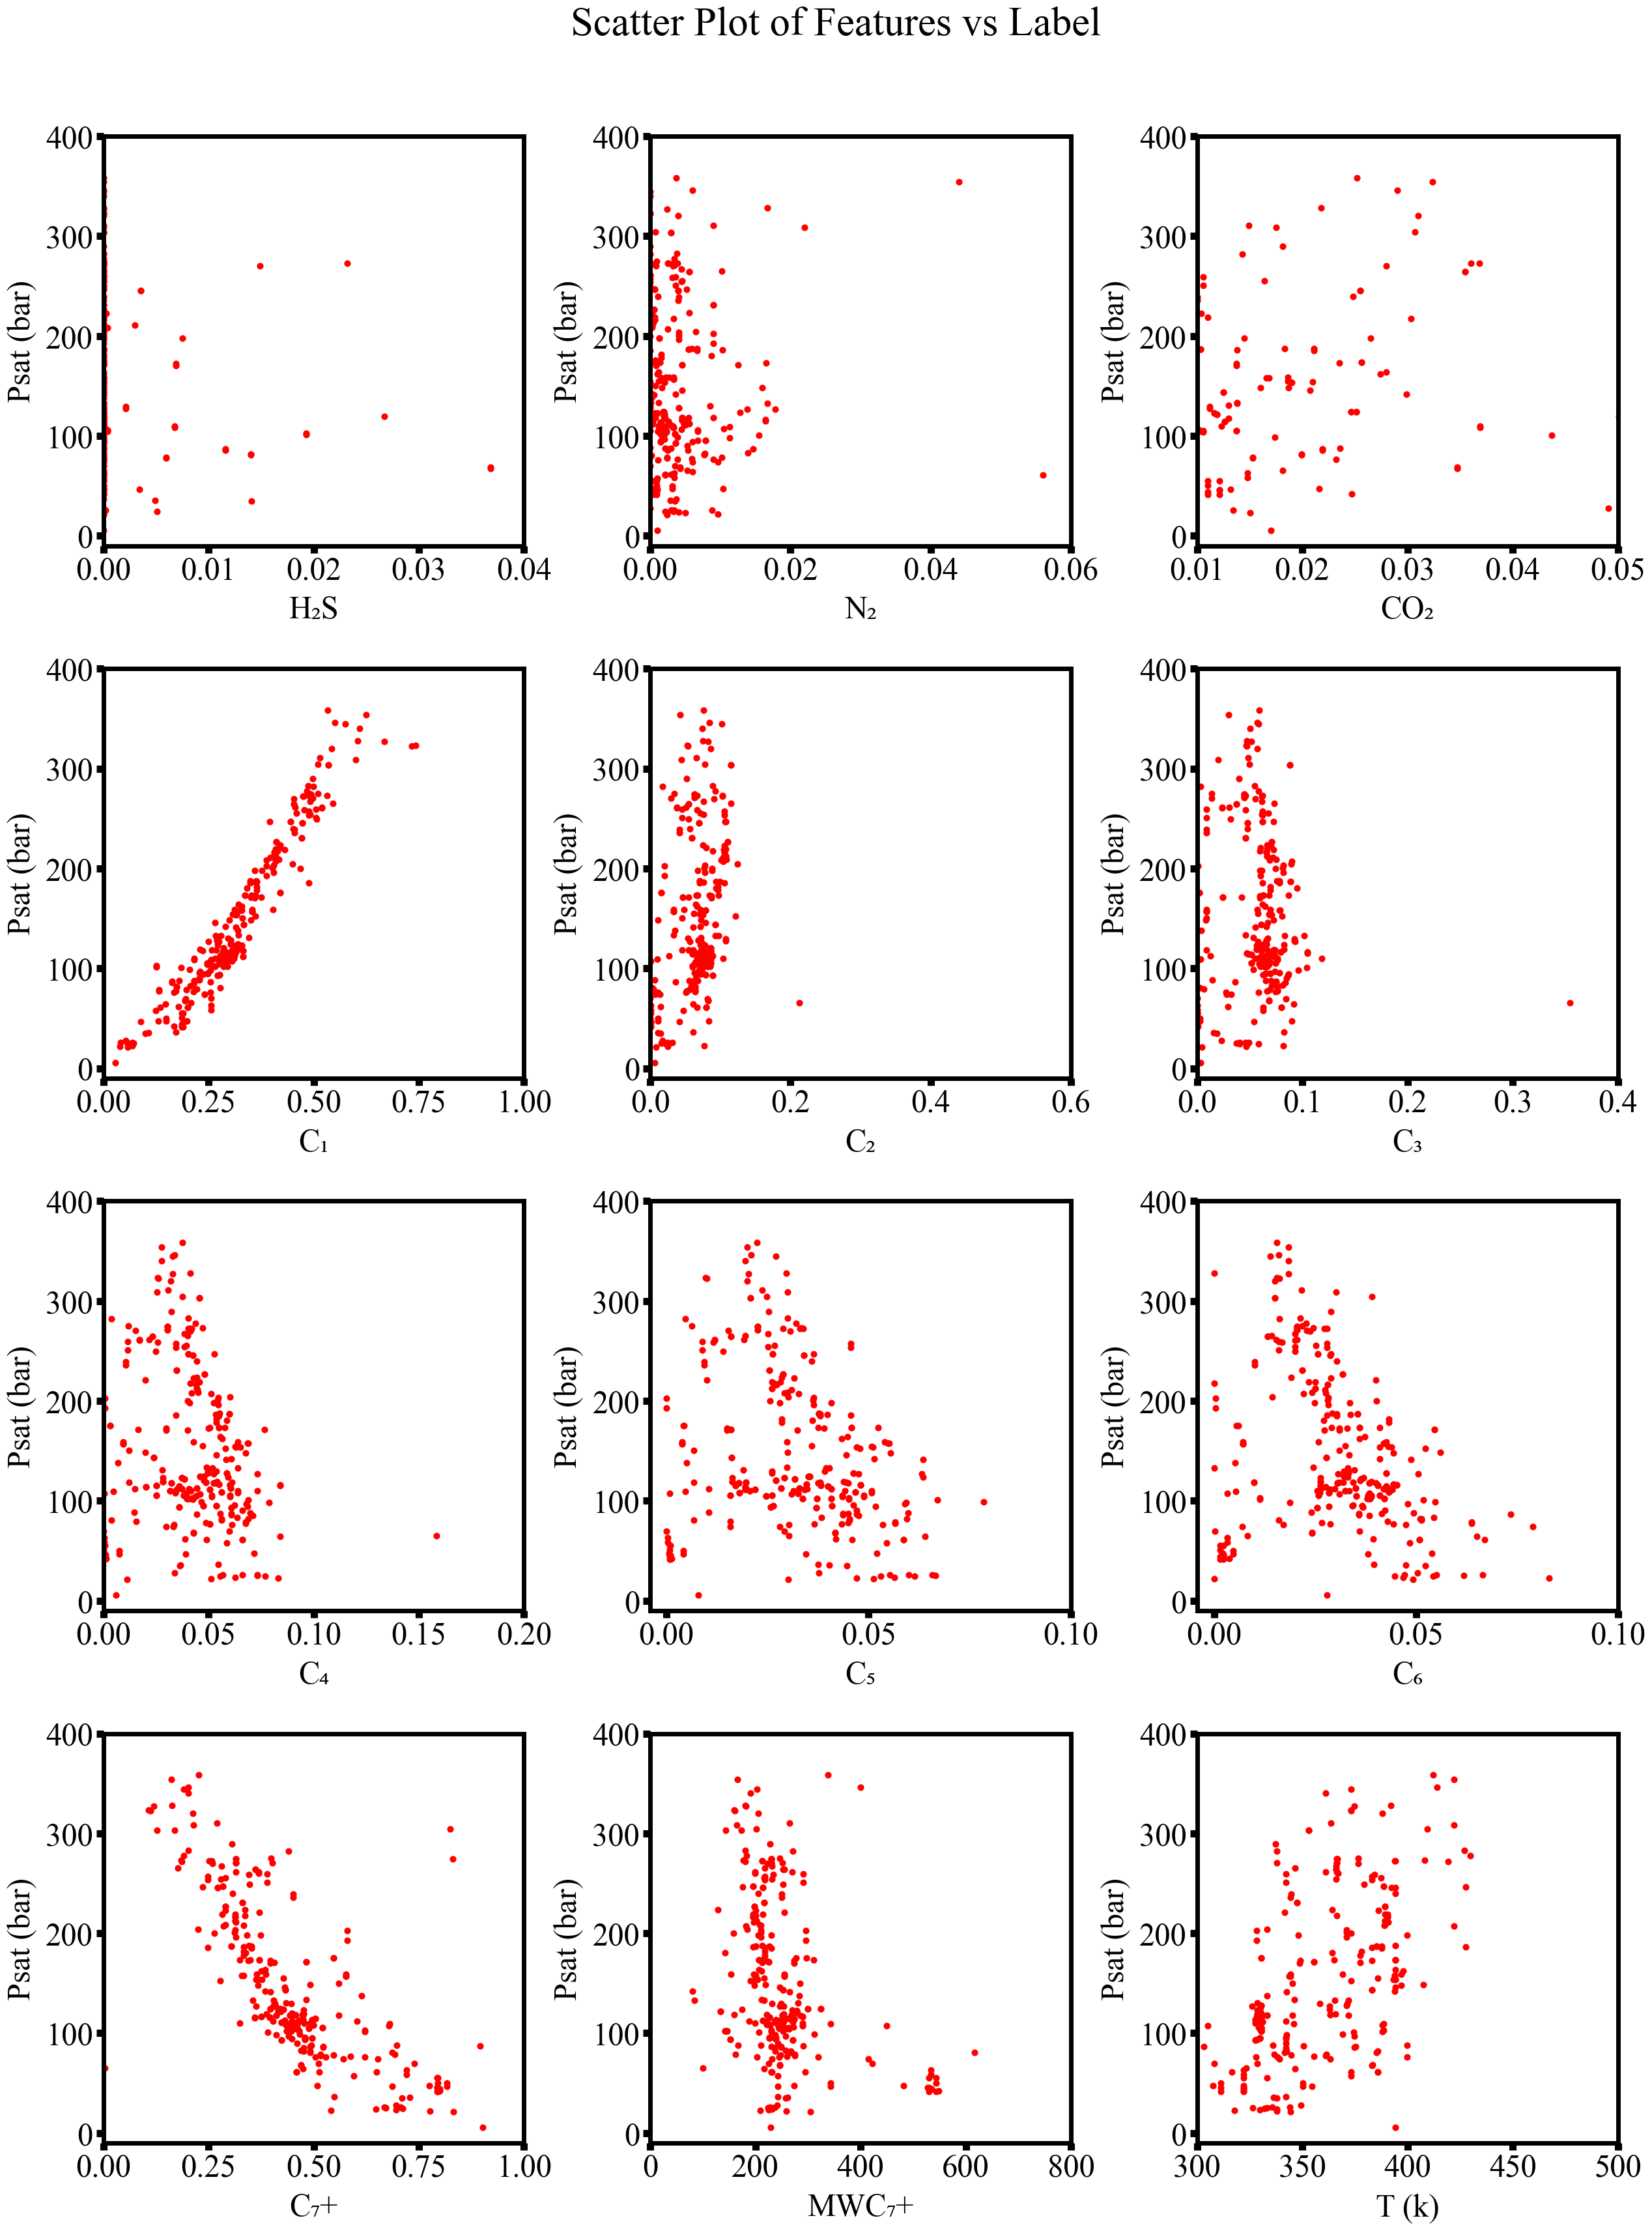

In [38]:
plt.rc('xtick', labelsize=35)
plt.rc('ytick', labelsize=35)
import matplotlib as mpl


mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 8
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 8

fig6 = plt.figure(figsize=(30,40) )
plt.suptitle("Scatter Plot of Features vs Label", fontsize = 45 , c = "black",y=0.93)


ax1 = plt.subplot(4,3,1)
plt.scatter(final_dataset["H2S"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("H\u2082S", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)


ax2 = plt.subplot(4,3,2)
plt.scatter(final_dataset["N2"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("N\u2082", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)



ax3 = plt.subplot(4,3,3)
plt.scatter(final_dataset["CO2"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("CO\u2082", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)



ax4 = plt.subplot(4,3,4)
plt.scatter(final_dataset["C1"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("C\u2081", fontsize =35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)


ax5 = plt.subplot(4,3,5)
plt.scatter(final_dataset["C2"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("C\u2082", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)




ax6 = plt.subplot(4,3,6)
plt.scatter(final_dataset["C3"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("C\u2083", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)


ax7 = plt.subplot(4,3,7)
plt.scatter(final_dataset["C4"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("C\u2084", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)




ax8 = plt.subplot(4,3,8)
plt.scatter(final_dataset["C5"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("C\u2085", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)



ax9 = plt.subplot(4,3,9)
plt.scatter(final_dataset["C6"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("C\u2086", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)



ax10 = plt.subplot(4,3,10)
plt.scatter(final_dataset["C7+"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("C\u2087+", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)



ax11 = plt.subplot(4,3,11)
plt.scatter(final_dataset["MWC7+"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("MWC\u2087+", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)


ax12 = plt.subplot(4,3,12)
plt.scatter(final_dataset["Temp"],final_dataset["Psat"],c = "red",s =40)
plt.xlabel("T (k)", fontsize = 35,labelpad = 10)
plt.ylabel("Psat (bar)",fontsize = 35,labelpad = 10)

plt.subplots_adjust(wspace=0.3,hspace=0.3)  

#Changing Border thickness of all subplots
for i in range(1,13,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(5)

#Set y axis value for better representation
for i in range(1,13,1):
        locals()["ax"+str(i)].set_ylim(-10,400)
        
#Set x axis value for better representation
ax1.set_xlim(0.0,0.04)


ax2.set_xlim(0.0,0.06)


ax3.set_xlim(0.01,0.05)


ax4.set_xlim(0,1)


ax5.set_xlim(0,0.6)


ax6.set_xlim(0,0.4)


ax7.set_xlim(0,0.2)


ax8.set_xlim(None,0.1)


ax9.set_xlim(None,0.1)


ax10.set_xlim(0,1)


ax11.set_xlim(0,800)


ax12.set_xlim(300,500)




fig6.savefig(figure_path + "SCATTER PLOT PSAT.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
#fig6.savefig(tif_figure + "SCATTER PLOT PSAT.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [39]:
## Exporting Final Dataset for further utility

In [40]:
finalized = final_dataset.copy()

In [41]:
df.iloc[finalized.index].to_excel(export_data_path+"FINALDATA.xlsx")

## 4. Selecting Features and Labels

                       #### Splitting Data For Train and Test ####

In [42]:
train , test  = train_test_split(finalized , test_size = 0.30 , random_state = 80)

In [43]:
train_file_name = "TRAIN.csv"
test_file_name = "TEST.csv"
train.to_csv(path+train_file_name , header=True,index=False ,float_format="%.6f")
test.to_csv(path+test_file_name , header=True, index=False,float_format="%.6f")

.......................................THE END........................................................